In [1]:
import IPython as ipy
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.utils
import torch.optim as optim
import torch.utils.data as data
from tqdm.auto import tqdm

import itertools as it
import time

from ner import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device:', device)

device: cuda


In [2]:
#tok_to_id, glv_emb = load_emb('data/glove/glove.6B.100d.txt', int(4e5))
#torch.save((tok_to_id, glv_emb), 'data/pt-cache/tok_to_id__glv_emb.pt')
tok_to_id, glv_emb = torch.load('data/pt-cache/tok_to_id__glv_emb.pt')

In [3]:
#chr_to_id = load_chrs('data/ner-gmb/train.txt')
#torch.save(chr_to_id, 'data/pt-cache/chr_to_id.pt')
chr_to_id = torch.load('data/pt-cache/chr_to_id.pt')

In [4]:
#lbl_to_id, id_to_lbl = load_classes('data/ner-gmb/train.txt')
#torch.save((lbl_to_id, id_to_lbl), 'data/pt-cache/lbl_to_id__id_to_lbl')
lbl_to_id, id_to_lbl = torch.load('data/pt-cache/lbl_to_id__id_to_lbl')

In [5]:
#train_W, train_X, train_Y = load_data('data/ner-gmb/train.txt', tok_to_id, lbl_to_id, chr_to_id)
#torch.save((train_W, train_X, train_Y), 'data/pt-cache/train_W__train_X__train_Y.pt')
train_W, train_X, train_Y = torch.load('data/pt-cache/train_W__train_X__train_Y.pt')

In [6]:
#dev_W, dev_X, dev_Y = load_data('data/ner-gmb/dev.txt', tok_to_id, lbl_to_id, chr_to_id)
#torch.save((dev_W, dev_X, dev_Y), 'data/pt-cache/dev_W__dev_X__dev_Y.pt')
dev_W, dev_X, dev_Y = torch.load('data/pt-cache/dev_W__dev_X__dev_Y.pt')

In [7]:
#test_W, test_X, test_Y = load_data('data/ner-gmb/test.txt', tok_to_id, lbl_to_id, chr_to_id)
#torch.save((test_W, test_X, test_Y), 'data/pt-cache/test_W__test_X__test_Y.pt')
test_W, test_X, test_Y = torch.load('data/pt-cache/test_W__test_X__test_Y.pt')

In [8]:
train_W = train_W.to(device)
train_X = train_X.to(device)
train_Y = train_Y.to(device)

In [9]:
dev_W = dev_W.to(device)
dev_X = dev_X.to(device)
dev_Y = dev_Y.to(device)

In [10]:
test_W = test_W.to(device)
test_X = test_X.to(device)
test_Y = test_Y.to(device)

In [15]:
assert(lbl_to_id['PAD_LBL'] == len(lbl_to_id)-1)
rand_model = NERModel(
    embed_model=TokEmbModel(
        init_emb=torch.randn(len(tok_to_id), 100),
        pad_tok_id=tok_to_id['PAD_TOK']
    ),
    seq_tag_model=SeqTagModel(
        input_size=100,
        hidden_size=100,
        output_size=len(lbl_to_id)-1,
        dropout_prob=0.5,
    ),
    pad_lbl_id=lbl_to_id['PAD_LBL'],
    pad_tok_id=tok_to_id['PAD_TOK']
)
#rand_model.load_state_dict(torch.load('data/pt-cache/rand_model.pt'))

In [16]:
train_losses, train_metrics, dev_losses, dev_metrics = train_loop(
    train_set=(train_W, train_X, train_Y),
    dev_set=(dev_W, dev_X, dev_Y),
    model=rand_model.to(device),
    lr=0.001,
    cos_max=100,
    n_classes=len(lbl_to_id)-1,
    train_batch_size=128,
    dev_batch_size=128,
    grad_clip_norm=5,
    patience=5,
    max_epochs=100,
    show=False
)

0.0009997532801828658


0.0009990133642141358


0.00099778098230154


0.000996057350657239


0.0009938441702975688


0.0009911436253643444


0.0009879583809693736


0.0009842915805643154


0.0009801468428384714


0.0009755282581475767


0.0009704403844771127


0.0009648882429441257


0.0009588773128419905


0.0009524135262330098


0.0009455032620941839


0.0009381533400219318


0.0009303710135019719


0.0009221639627510076


0.000913540287137281


0.0009045084971874739


0.0008950775061878452


0.0008852566213878947


0.0008750555348152298


0.0008644843137107057


0.0008535533905932737


0.0008422735529643444


0.0008306559326618259


0.0008187119948743449


0.0008064535268264883


0.0007938926261462367


0.0007810416889260654


0.0007679133974894983


0.0007545207078751857


0.0007408768370508577


0.0007269952498697734


0.0007128896457825364


0.0006985739453173903


0.0006840622763423391


0.0006693689601226458


0.0006545084971874737


0.0006394955530196147


0.0006243449435824273


0.0006090716206982714


0.0005936906572928625


0.0005782172325201156


0.0005626666167821523


0.0005470541566592572


0.0005313952597646569


0.0005157053795390643


0.0005000000000000002


0.00048429462046093607


0.0004686047402353435


0.000452945843340743


0.00043733338321784806


0.0004217827674798847


0.00040630934270713783


0.000390928379301729


0.0003756550564175727


0.00036050444698038553


0.00034549150281252655


0.0003306310398773544


0.00031593772365766127


0.0003014260546826097


0.0002871103542174637


0.0002730047501302267


0.00025912316294914234


0.0002454792921248144


0.00023208660251050164


0.00021895831107393473


0.00020610737385376356


0.00019354647317351177


0.0001812880051256552


0.00016934406733817422


0.0001577264470356557


0.00014644660940672634


0.0001355156862892944


0.00012494446518477025


0.00011474337861210548


0.00010492249381215483


9.549150281252637e-05


8.645971286271918e-05


7.78360372489926e-05


6.962898649802815e-05


6.184665997806824e-05


5.449673790581613e-05


4.758647376699034e-05


4.112268715800956e-05


3.511175705587434e-05


2.9559615522887284e-05


2.447174185242324e-05


1.9853157161528526e-05


1.570841943568452e-05


1.204161903062634e-05


8.85637463565564e-06


6.155829702431171e-06


3.942649342761118e-06


2.2190176984600023e-06



In [17]:
torch.save(rand_model.state_dict(), 'data/pt-cache/rand_model.pt')

In [18]:
test_pred = rand_model.to(device).batch_predict(test_W, test_X, 4096)
print(conll_report(test_Y, test_pred, id_to_lbl, lbl_to_id['PAD_LBL']))

              precision    recall  f1-score   support

         art       0.42      0.08      0.13       102
         eve       0.53      0.36      0.42        87
         geo       0.84      0.86      0.85      9912
         gpe       0.92      0.91      0.92      4168
         nat       0.55      0.38      0.45        55
         org       0.67      0.60      0.63      5205
         per       0.74      0.76      0.75      4406
         tim       0.87      0.85      0.86      5275

   micro avg       0.81      0.80      0.81     29210
   macro avg       0.69      0.60      0.63     29210
weighted avg       0.81      0.80      0.80     29210



In [17]:
assert(lbl_to_id['PAD_LBL'] == len(lbl_to_id)-1)
glv_model = NERModel(
    embed_model=TokEmbModel(
        init_emb=glv_emb,
        pad_tok_id=tok_to_id['PAD_TOK']
    ),
    seq_tag_model=SeqTagModel(
        input_size=100,
        hidden_size=100,
        output_size=len(lbl_to_id)-1,
        dropout_prob=0.5
    ),
    pad_lbl_id=lbl_to_id['PAD_LBL'],
    pad_tok_id=tok_to_id['PAD_TOK'],
    class_freq=torch.bincount(train_Y.reshape(-1))[:-1]
)
#glv_model.load_state_dict(torch.load('data/pt-cache/glv_model.pt'))

TypeError: __init__() got an unexpected keyword argument 'class_freq'

In [ ]:
train_loop(
    train_set=(train_W, train_X, train_Y),
    dev_set=(dev_W, dev_X, dev_Y),
    model=glv_model.to(device),
    opt=optim.Adam(glv_model.parameters(), lr=0.01),
    n_classes=len(lbl_to_id)-1,
    batch_size=128,
    pred_batch_size=4096,
    grad_clip_norm=5
)

In [ ]:
torch.save(glv_model.state_dict(), 'data/pt-cache/glv_model.pt')

In [ ]:
test_pred = glv_model.to(device).batch_predict(test_X, 4096)
print(conll_report(test_Y, test_pred, id_to_lbl, lbl_to_id['PAD_LBL']))

In [2]:
chr_glv_model = NERModel(
    embed_model=ChrTokEmbModel(
        chr_emb_model=ChrEmbModel(
            n_embs=len(chr_to_id),
            pad_chr_id=chr_to_id['PAD_CHR'],
            emb_size=8,
            hidden_size=25
        ),
        tok_emb_model=nn.Embedding.from_pretrained(
            glv_emb,
            freeze=False,
            padding_idx=tok_to_id['PAD_TOK']
        )
    ),
    seq_tag_model=SeqTagModel(
        input_size=150,
        hidden_size=100,
        output_size=len(lbl_to_id)-1,
        dropout_prob=0.5
    ),
    pad_lbl_id=lbl_to_id['PAD_LBL'],
    pad_tok_id=tok_to_id['PAD_TOK'],
    class_freq=torch.bincount(train_Y.reshape(-1))[:-1]
)
#chr_glv_model.load_state_dict(torch.load('data/pt-cache/chr_glv_model.pt'))

NameError: name 'NERModel' is not defined

In [ ]:
train_loop(
    train_set=(train_W, train_X, train_Y),
    dev_set=(dev_W, dev_X, dev_Y),
    model=chr_glv_model.to(device),
    opt=optim.Adam(chr_glv_model.parameters(), lr=0.001),
    n_classes=len(lbl_to_id)-1,
    batch_size=128,
    pred_batch_size=2048,
    grad_clip_norm=5
)

In [ ]:
torch.save(chr_glv_model.state_dict(), 'data/pt-cache/glv_model.pt')

In [ ]:
test_pred = chr_glv_model.to(device).batch_predict(test_W, test_X, 4096)
print(conll_report(test_Y, test_pred, id_to_lbl, lbl_to_id['PAD_LBL']))

In [8]:
assert(lbl_to_id['PAD_LBL'] == len(lbl_to_id)-1)
ln_glv_model = NERModel(
    embed_model=TokEmbModel(
        init_emb=glv_emb,
        pad_tok_id=tok_to_id['PAD_TOK']
    ),
    seq_tag_model=LNSeqTagModel(
        input_size=100,
        hidden_size=100,
        output_size=len(lbl_to_id)-1,
        dropout_prob=0.5
    ),
    pad_lbl_id=lbl_to_id['PAD_LBL'],
    pad_tok_id=tok_to_id['PAD_TOK'],
    class_freq=torch.bincount(train_Y.reshape(-1))[:-1]
)
#ln_glv_model.load_state_dict(torch.load('data/pt-cache/ln_glv_model.pt'))

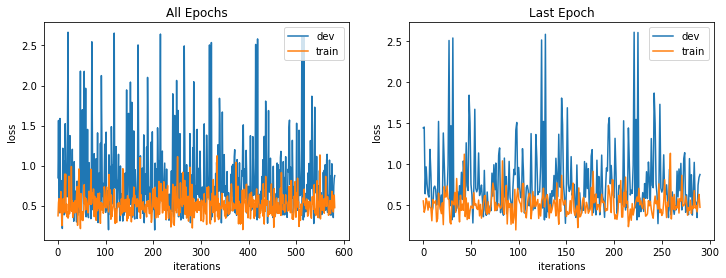

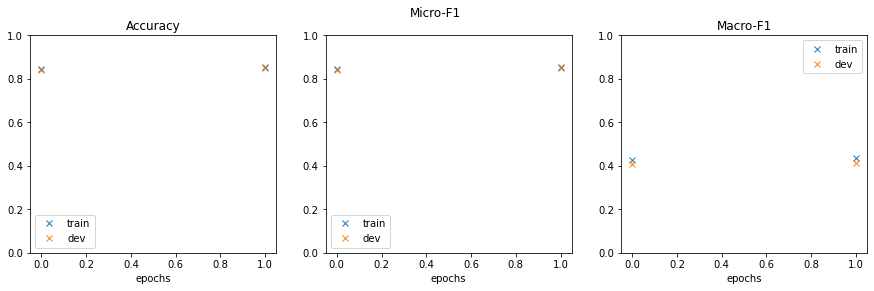

0.4750710129737854
0.8744432926177979


KeyboardInterrupt: 

In [20]:
train_loop(
    train_set=(train_W, train_X, train_Y),
    dev_set=(dev_W, dev_X, dev_Y),
    model=ln_glv_model.to(device),
    opt=optim.Adam(ln_glv_model.parameters(), lr=0.0001),
    n_classes=len(lbl_to_id)-1,
    batch_size=128,
    pred_batch_size=4096,
    grad_clip_norm=5
)

In [21]:
torch.save(ln_glv_model.state_dict(), 'data/pt-cache/ln_glv_model.pt')

In [22]:
test_pred = ln_glv_model.to(device).batch_predict(test_W, test_X, 4096)

In [23]:
tic = time.time()
print(conll_report(test_Y, test_pred, id_to_lbl, lbl_to_id['PAD_LBL']))
toc = time.time()
print(toc-tic)

              precision    recall  f1-score   support

         art       0.01      0.32      0.02       102
         eve       0.04      0.52      0.07        87
         geo       0.60      0.79      0.68      9912
         gpe       0.78      0.87      0.82      4168
         nat       0.04      0.58      0.07        55
         org       0.24      0.44      0.31      5205
         per       0.55      0.74      0.63      4406
         tim       0.24      0.49      0.32      5275

   micro avg       0.40      0.67      0.50     29210
   macro avg       0.31      0.59      0.37     29210
weighted avg       0.48      0.67      0.56     29210

11.826610326766968


In [11]:
ln_chr_glv_model = NERModel(
    embed_model=ChrTokEmbModel(
        chr_emb_model=ChrEmbModel(
            n_embs=len(chr_to_id),
            pad_chr_id=chr_to_id['PAD_CHR'],
            emb_size=8,
            hidden_size=25,
            unk_chr_id=chr_to_id['UNK_CHR'],
            unk_replace_prob=0.2
        ),
        tok_emb_model=TokEmbModel(
            init_emb=glv_emb,
            pad_tok_id=tok_to_id['PAD_TOK']
        ),
    ),
    seq_tag_model=LNSeqTagModel(
        input_size=150,
        hidden_size=100,
        output_size=len(lbl_to_id)-1,
        dropout_prob=0.5
    ),
    pad_lbl_id=lbl_to_id['PAD_LBL'],
    pad_tok_id=tok_to_id['PAD_TOK']
)
#ln_chr_glv_model.load_state_dict(torch.load('data/pt-cache/ln_chr_glv_model.pt'))

In [20]:
train_loop(
    train_set=(train_W, train_X, train_Y),
    dev_set=(dev_W, dev_X, dev_Y),
    model=ln_chr_glv_model.to(device),
    lr=0.001,
    cos_max=10,
    n_classes=len(lbl_to_id)-1,
    train_batch_size=128,
    dev_batch_size=128,
    grad_clip_norm=5,
    patience=3,
    max_epochs=100,
    show=False
)

0.0009755282581475768


0.0009045084971874736


0.0007938926261462366


0.0006545084971874737



([0.07222694903612137,
  0.056267622858285904,
  0.0628572627902031,
  0.05374956130981445,
  0.05427341163158417,
  0.042730286717414856,
  0.04443303123116493,
  0.04920130595564842,
  0.050296932458877563,
  0.04919472709298134,
  0.05453028529882431,
  0.07218747586011887,
  0.0430409200489521,
  0.05611911043524742,
  0.04503302276134491,
  0.04847097396850586,
  0.04084367677569389,
  0.04171796143054962,
  0.06195199862122536,
  0.04498093202710152,
  0.05530839413404465,
  0.058663465082645416,
  0.04439467564225197,
  0.05942241847515106,
  0.04868136718869209,
  0.06377633661031723,
  0.06287714093923569,
  0.04330388084053993,
  0.052154187113046646,
  0.04688587784767151,
  0.04454159364104271,
  0.05314933881163597,
  0.058061711490154266,
  0.04724319279193878,
  0.04110421985387802,
  0.043533213436603546,
  0.05980009585618973,
  0.05646244063973427,
  0.05920771509408951,
  0.0528162345290184,
  0.052808452397584915,
  0.05462720990180969,
  0.04007876664400101,
  0.05

In [17]:
torch.save(ln_chr_glv_model.state_dict(), 'data/pt-cache/ln_chr_glv_model.pt')

In [18]:
test_pred = ln_chr_glv_model.to(device).batch_predict(test_W, test_X, 4096)

In [19]:
tic = time.time()
print(conll_report(test_Y, test_pred, id_to_lbl, lbl_to_id['PAD_LBL']))
toc = time.time()
print(toc-tic)

              precision    recall  f1-score   support

         art       0.14      0.05      0.07       102
         eve       0.43      0.34      0.38        87
         geo       0.81      0.89      0.85      9912
         gpe       0.92      0.91      0.91      4168
         nat       0.44      0.38      0.41        55
         org       0.65      0.57      0.60      5205
         per       0.76      0.77      0.77      4406
         tim       0.83      0.86      0.84      5275

   micro avg       0.79      0.81      0.80     29210
   macro avg       0.62      0.60      0.61     29210
weighted avg       0.79      0.81      0.80     29210

15.470650911331177
